In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine

# Replace these values with your database information
dbname = "telecome"
user = "mebmeressa"
password = ""
host = "localhost"
port = 5432  # Default is usually 5432

# Create a SQLAlchemy engine
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{dbname}")

# Initialize connection and cursor
connection = None
try:
    # Establish a connection
    connection = engine.connect()

    # Replace this query with your own SQL query
    query = 'SELECT * FROM xdr_data'

    # Use Pandas to execute the query and fetch data into a DataFrame
    df = pd.read_sql_query(query, connection)

    # Now 'df' contains your data in a Pandas DataFrame
    print(df.head())

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection in the 'finally' block to ensure it happens
    if connection:
        connection.close()



   id     Bearer Id            Start  Start ms              End  End ms  \
0   1  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1   2  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2   3  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3   4  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4   5  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  ...  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13  ...   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13  ...   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13  ...   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13  ...   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13  ...   

  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0         15854611.0           2501332.0           8198936.0   
1         20247395.0          191117

# Overview of the Data

In [2]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   id                                        150001 non-null  int64  
 1   Bearer Id                                 149010 non-null  float64
 2   Start                                     150000 non-null  object 
 3   Start ms                                  150000 non-null  float64
 4   End                                       150000 non-null  object 
 5   End ms                                    150000 non-null  float64
 6   Dur. (ms)                                 150000 non-null  float64
 7   IMSI                                      149431 non-null  float64
 8   MSISDN/Number                             148935 non-null  float64
 9   IMEI                                      149429 non-null  float64
 10  Last Location Name  

In [3]:

# Display basic statistics about the numerical columns
df.describe()

,id,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000000,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,75001.000000,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,43301.703202,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,1.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,37501.000000,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,75001.000000,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,112501.000000,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,150001.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [4]:


# Display the first few rows of the DataFrame
df.head()


,id,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,2,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,3,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,4,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,5,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Handle Missing Values:

In [5]:
# Check for missing values
print(df.isnull().sum().sum())
print(df.isnull().sum())
# print(df.count())

1031392
id                                               0
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mb

In [6]:
# Assuming 'df' is your DataFrame
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': missing_percentage
})

# Sort the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the results
print(missing_percentage)
# print(missing_info)

id                                           0.000000
Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (

# numeric columns with 0-10% missing values and filled with median

In [7]:



#  'df' is DataFrame
# List of numeric columns with 0-10% missing values
numeric_columns_0_to_10_percent_missing = [
    'Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
    '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
    '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)',
    'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
    'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
    'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'
]

# Iterate over the selected columns and replace missing values with the median
for column in numeric_columns_0_to_10_percent_missing:
    # Check if the column has missing values and if it is numeric
    if df[column].isnull().any() and pd.api.types.is_numeric_dtype(df[column]):
        # Replace missing values with the median
        df[column].fillna(df[column].median(), inplace=True)

    # Check if the column is numeric before calculating skewness
    if pd.api.types.is_numeric_dtype(df[column]):
        skewness = df[column].skew()
#         print(f"Column: {column}")
#         print(f"Missing Percentage: {df[column].isnull().mean() * 100:.2f}%")
#         print(f"Skewness: {skewness:.2f}")

# Alternatively, you can replace with the mean instead of the median
# for column in numeric_columns_0_to_10_percent_missing:
#     if df[column].isnull().any() and pd.api.types.is_numeric_dtype(df[column]):
#         df[column].fillna(df[column].mean(), inplace=True)



# columns with 10-20% missing values and filled with mean

In [8]:

# Assuming 'df' is your DataFrame containing the data
missing_percentage = df.isnull().mean() * 100  # Calculate missing value percentages

# Filter columns with missing value percentages between 10-20%
columns_with_10_to_20_percent_missing = missing_percentage[
    (missing_percentage >= 10) & (missing_percentage <= 20)
].index.tolist()

# Print or use the list of columns
print("Columns with missing value percentage between 10-20%:")
print(columns_with_10_to_20_percent_missing)

# Iterate through columns and check for missing values
for column in columns_with_10_to_20_percent_missing:
    missing_percentage_for_column = df[column].isnull().mean() * 100
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        skewness_for_column = df[column].skew()
    else:
        skewness_for_column = None
    
    print("==============================")
    print(f"Column: {column}")
    print(f"Missing Percentage: {missing_percentage_for_column:.2f}%")
    print(f"Skewness: {skewness_for_column}")

Columns with missing value percentage between 10-20%:
['Avg RTT DL (ms)', 'Avg RTT UL (ms)']
Column: Avg RTT DL (ms)
Missing Percentage: 18.55%
Skewness: 62.90782807995961
Column: Avg RTT UL (ms)
Missing Percentage: 18.54%
Skewness: 28.457414585463813


In [9]:
# Replace missing values in specific columns with their respective medians
for column in ['Avg RTT DL (ms)', 'Avg RTT UL (ms)']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Verify that missing values have been filled
print("Missing values filled with medians:")
print(df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].isnull().sum())


Missing values filled with medians:
Avg RTT DL (ms)    0
Avg RTT UL (ms)    0
dtype: int64


# missing values >20 % droping the column

In [10]:


# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Identify columns with missing values exceeding 20%
columns_to_drop = missing_percentage[missing_percentage > 20].index.tolist()

# Drop columns with missing values exceeding 20%
df.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns in the DataFrame
print("Columns after dropping:", df.columns.tolist())
df.shape


Columns after dropping: ['id', 'Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


(150001, 46)

# Categorical Columns:

In [11]:
# Fill missing values in categorical columns with the mode
categorical_columns = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)


# Non-Numeric Columns (Other than Categorical):

In [12]:
# Fill missing values in non-numeric, non-categorical columns with a specific value
non_numeric_columns = ['IMSI', 'MSISDN/Number', 'IMEI']
for column in non_numeric_columns:
    df[column].fillna('Unknown', inplace=True)


In [13]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': missing_percentage
})

# Sort the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the results
print(missing_percentage)
# print(missing_info)

id                                0.000000
Bearer Id                         0.000000
Start                             0.000667
Start ms                          0.000000
End                               0.000667
End ms                            0.000000
Dur. (ms)                         0.000000
IMSI                              0.000000
MSISDN/Number                     0.000000
IMEI                              0.000000
Last Location Name                0.000000
Avg RTT DL (ms)                   0.000000
Avg RTT UL (ms)                   0.000000
Avg Bearer TP DL (kbps)           0.000000
Avg Bearer TP UL (kbps)           0.000000
DL TP < 50 Kbps (%)               0.000000
50 Kbps < DL TP < 250 Kbps (%)    0.000000
250 Kbps < DL TP < 1 Mbps (%)     0.000000
DL TP > 1 Mbps (%)                0.000000
UL TP < 10 Kbps (%)               0.000000
10 Kbps < UL TP < 50 Kbps (%)     0.000000
50 Kbps < UL TP < 300 Kbps (%)    0.000000
UL TP > 300 Kbps (%)              0.000000
Activity Du

In [ ]:
cleaned_df=pd.dataframe()


# Data Visualization:

# Top 10 handsets used by the customers

In [79]:

handset_counts = df['Handset Type'].value_counts().head(10)

# Display the top 10 handsets
print("Top 10 Handsets Used by Customers:")
print(handset_counts)


Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


# identify the top 3 handset manufacturers

In [80]:

manufacturer_counts = df['Handset Manufacturer'].value_counts().head(3)
# Display the top 3 handset manufacturers
print("Top 3 Handset Manufacturers:")
print(manufacturer_counts)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


# identify the top 5 handsets per top 3 handset manufacturer

In [81]:

top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
# Iterate through the top manufacturers
for manufacturer in top_manufacturers:
    # Filter DataFrame for the current manufacturer
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    
    # Get the top 5 handsets for the current manufacturer
    top_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
    
    # Display the results
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_handsets)
    print("\n")


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64




# aggregate per user number of xdr sessions

In [82]:

sessions_per_user = df.groupby('MSISDN/Number')['Bearer Id'].nunique()

# Display the aggregated results
print("Number of XDR Sessions per User:")
print(sessions_per_user)


Number of XDR Sessions per User:
MSISDN/Number
33601001722.0          1
33601001754.0          1
33601002511.0          1
33601007832.0          1
33601008617.0          2
                    ... 
33789997247.0          1
3197020876596.0        1
337000037000919.0      1
882397108489451.0      1
Unknown              502
Name: Bearer Id, Length: 106857, dtype: int64


# aggregate per user  sessions duration

In [83]:


# Convert 'Dur. (ms)' to minutes for better readability
df['Session Duration (minutes)'] = df['Dur. (ms)'] / (1000 * 60)

# Aggregate per user sessions duration
user_sessions_duration = df.groupby('MSISDN/Number')['Session Duration (minutes)'].sum()

# Display the result
print("Per-User Sessions Duration:")
print(user_sessions_duration)


Per-User Sessions Duration:
MSISDN/Number
33601001722.0           1.945333
33601001754.0           3.020500
33601002511.0           2.249483
33601007832.0           0.831300
33601008617.0           0.618400
                        ...     
33789997247.0           2.349800
3197020876596.0        14.623083
337000037000919.0       4.217167
882397108489451.0      14.497400
Unknown              1208.879917
Name: Session Duration (minutes), Length: 106857, dtype: float64


# aggregate per user  the total download(DL) and upload(UL) data

In [84]:
user_data = df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Display the aggregated data
print("Aggregated Data per User:")
print(user_data)

Aggregated Data per User:
                   Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                        
33601001722.0          8.426375e+08      3.605311e+07
33601001754.0          1.207552e+08      3.610446e+07
33601002511.0          5.566597e+08      3.930682e+07
33601007832.0          4.019932e+08      2.032753e+07
33601008617.0          1.363130e+09      9.428053e+07
...                             ...               ...
33789997247.0          4.445751e+08      3.573224e+07
3197020876596.0        1.948281e+08      3.729592e+07
337000037000919.0      5.396350e+08      5.665284e+07
882397108489451.0      7.869760e+07      6.045605e+07
Unknown                4.873795e+11      4.436645e+10

[106857 rows x 2 columns]


# aggregate per user  the total volume(in bytes) during this session for each application

In [85]:

user_identifier = 'MSISDN/Number'

# List of columns representing different applications
application_columns = [
    'Social Media DL (Bytes)',
    'Google DL (Bytes)',
    'Email DL (Bytes)',
    'Youtube DL (Bytes)',
    'Netflix DL (Bytes)',
    'Gaming DL (Bytes)',
    'Other DL (Bytes)'

]

# Create a new DataFrame to store aggregated results
aggregated_df = pd.DataFrame()

# Aggregate total volume for each application per user
for column in application_columns:
    # Group by user and sum the volume for the current application
    app_aggregated = df.groupby(user_identifier)[column].sum().reset_index()
    
    # Rename the column to include the application name
    app_aggregated.rename(columns={column: f'Total {column}'}, inplace=True)
    
    # Merge with the aggregated_df
    if aggregated_df.empty:
        aggregated_df = app_aggregated
    else:
        aggregated_df = pd.merge(aggregated_df, app_aggregated, on=user_identifier)

# Display the aggregated results
print(aggregated_df)


            MSISDN/Number  Total Social Media DL (Bytes)  \
0           33601001722.0                   2.206504e+06   
1           33601001754.0                   2.598548e+06   
2           33601002511.0                   3.148004e+06   
3           33601007832.0                   2.514690e+05   
4           33601008617.0                   2.861230e+06   
...                   ...                            ...   
106852      33789997247.0                   4.422140e+05   
106853    3197020876596.0                   6.685960e+05   
106854  337000037000919.0                   4.963370e+05   
106855  882397108489451.0                   1.500145e+06   
106856            Unknown                   1.937715e+09   

        Total Google DL (Bytes)  Total Email DL (Bytes)  \
0                  3.337123e+06            8.374000e+05   
1                  4.197697e+06            2.828821e+06   
2                  3.343483e+06            2.436500e+06   
3                  5.937765e+06            

In [86]:

# Define the time threshold for a new session (in seconds)
session_threshold = 1800  # 30 minutes

# Convert the 'Start' column to datetime format
df['Start'] = pd.to_datetime(df['Start'])

# Sort the DataFrame by user and session start time
df.sort_values(by=['MSISDN/Number', 'Start'], inplace=True)

# Calculate the time difference between consecutive sessions for each user
df['SessionTimeDiff'] = df.groupby('MSISDN/Number')['Start'].diff()

# Identify session boundaries based on the time threshold
df['NewSession'] = df['SessionTimeDiff'].gt(pd.Timedelta(seconds=session_threshold))

# Count the number of sessions per user
session_counts = df.groupby('MSISDN/Number')['NewSession'].sum()

# Display the session frequency per user
print("Session Frequency per User:")
print(session_counts)


Session Frequency per User:
MSISDN/Number
33601001722.0         0
33601001754.0         0
33601002511.0         0
33601007832.0         0
33601008617.0         0
                     ..
33789997247.0         0
3197020876596.0       0
337000037000919.0     0
882397108489451.0     0
Unknown              81
Name: NewSession, Length: 106857, dtype: int64


In [87]:

user_identifier = 'MSISDN/Number'

# Convert 'Start' and 'End' columns to datetime data type
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate session duration per user
df['Session Duration'] = df['End'] - df['Start']

# Aggregate total session duration per user
total_duration_per_user = df.groupby(user_identifier)['Session Duration'].sum().reset_index()

# Display the total session duration per user
print(total_duration_per_user)


            MSISDN/Number  Session Duration
0           33601001722.0   1 days 08:26:00
1           33601001754.0   2 days 02:21:00
2           33601002511.0   1 days 13:30:00
3           33601007832.0   0 days 13:52:00
4           33601008617.0   0 days 10:20:00
...                   ...               ...
106852      33789997247.0   1 days 15:10:00
106853    3197020876596.0  10 days 03:43:00
106854  337000037000919.0   2 days 22:17:00
106855  882397108489451.0  10 days 01:37:00
106856            Unknown 838 days 12:22:00

[106857 rows x 2 columns]


In [88]:
user_identifier = 'MSISDN/Number'

# Sum download and upload volumes for each user
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate total traffic per user
total_traffic_per_user = df.groupby(user_identifier)['Total Traffic (Bytes)'].sum().reset_index()

# Display the results
print(total_traffic_per_user)

            MSISDN/Number  Total Traffic (Bytes)
0           33601001722.0           8.786906e+08
1           33601001754.0           1.568596e+08
2           33601002511.0           5.959665e+08
3           33601007832.0           4.223207e+08
4           33601008617.0           1.457411e+09
...                   ...                    ...
106852      33789997247.0           4.803073e+08
106853    3197020876596.0           2.321240e+08
106854  337000037000919.0           5.962878e+08
106855  882397108489451.0           1.391536e+08
106856            Unknown           5.317459e+11

[106857 rows x 2 columns]


In [89]:

user_identifier = 'MSISDN/Number'

# List of engagement metrics to aggregate
engagement_metrics = [
    'Total Traffic (Bytes)',
    'Dur. (ms)',  # Add more metrics as needed
]

# Create a new DataFrame to store aggregated results
aggregated_metrics_df = pd.DataFrame()

# Aggregate metrics per customer
for metric in engagement_metrics:
    # Group by user and calculate the total for the current metric
    metric_aggregated = df.groupby(user_identifier)[metric].sum().reset_index()
    
    # Rename the column to include the metric name
    metric_aggregated.rename(columns={metric: f'Total {metric}'}, inplace=True)
    
    # Merge with the aggregated_metrics_df
    if aggregated_metrics_df.empty:
        aggregated_metrics_df = metric_aggregated
    else:
        aggregated_metrics_df = pd.merge(aggregated_metrics_df, metric_aggregated, on=user_identifier)

# Display the aggregated results
print("Aggregated Metrics per Customer:")
print(aggregated_metrics_df)

# Report the top 10 customers for each metric
for metric in engagement_metrics:
    top_10_customers = aggregated_metrics_df.sort_values(f'Total {metric}', ascending=False).head(10)
    print(f"\nTop 10 Customers for {metric}:")
    print(top_10_customers[[user_identifier, f'Total {metric}']])


Aggregated Metrics per Customer:
            MSISDN/Number  Total Total Traffic (Bytes)  Total Dur. (ms)
0           33601001722.0                 8.786906e+08         116720.0
1           33601001754.0                 1.568596e+08         181230.0
2           33601002511.0                 5.959665e+08         134969.0
3           33601007832.0                 4.223207e+08          49878.0
4           33601008617.0                 1.457411e+09          37104.0
...                   ...                          ...              ...
106852      33789997247.0                 4.803073e+08         140988.0
106853    3197020876596.0                 2.321240e+08         877385.0
106854  337000037000919.0                 5.962878e+08         253030.0
106855  882397108489451.0                 1.391536e+08         869844.0
106856            Unknown                 5.317459e+11       72532795.0

[106857 rows x 3 columns]

Top 10 Customers for Total Traffic (Bytes):
        MSISDN/Number  Total To

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

user_identifier = 'MSISDN/Number'

# List of engagement metrics to normalize and use for clustering
engagement_metrics = [
    'Total Traffic (Bytes)',
    'Dur. (ms)',  # Add more metrics as needed
]

# Create a new DataFrame to store normalized metrics
normalized_metrics_df = pd.DataFrame()

# Normalize engagement metrics
scaler = StandardScaler()
for metric in engagement_metrics:
    # Check if the metric exists in the DataFrame
    if metric in df.columns:
        # Reshape the data for normalization
        data = df[metric].values.reshape(-1, 1)
        
        # Normalize the metric
        normalized_metric = scaler.fit_transform(data)
        
        # Add the normalized metric to the DataFrame
        normalized_metrics_df[f'Normalized {metric}'] = normalized_metric.flatten()

# Display the normalized metrics
print("Normalized Engagement Metrics:")
print(normalized_metrics_df)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = KMeans(n_clusters=3, n_init=10)
cluster_labels = kmeans.fit_predict(normalized_metrics_df)

# Add cluster labels to the original DataFrame
df['Cluster Label'] = cluster_labels

# Display the DataFrame with cluster labels
print("DataFrame with Cluster Labels:")
print(df[['MSISDN/Number', 'Cluster Label']])


Cluster-wise Metrics Summary:
                               min          max          mean           sum  \
Total Traffic (Bytes)   39915286.0  949172538.0  4.955599e+08  5.372365e+12   
Dur. (ms)                 187278.0    1859336.0  3.076468e+05  3.335199e+09   
Total Traffic (Bytes)  494569142.0  955984776.0  7.074023e+08  4.947643e+13   
Dur. (ms)                   7142.0     231650.0  8.885967e+04  6.214934e+09   
Total Traffic (Bytes)   28956107.0  494860943.0  2.819515e+08  1.951640e+13   
Dur. (ms)                   7189.0     230868.0  8.872184e+04  6.141237e+09   

                       Cluster  
Total Traffic (Bytes)        0  
Dur. (ms)                    0  
Total Traffic (Bytes)        1  
Dur. (ms)                    1  
Total Traffic (Bytes)        2  
Dur. (ms)                    2  

Visualization for Total Traffic (Bytes):


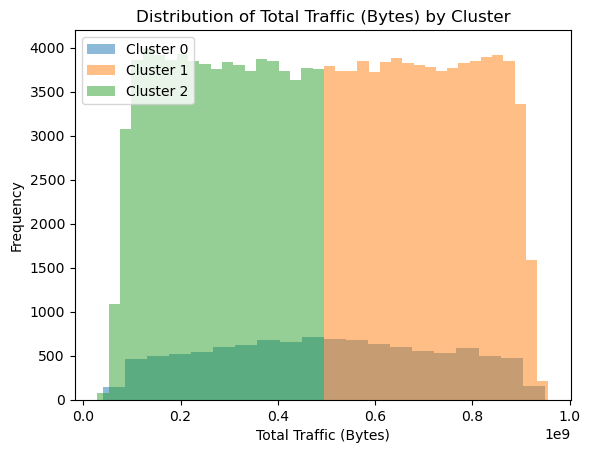


Visualization for Dur. (ms):


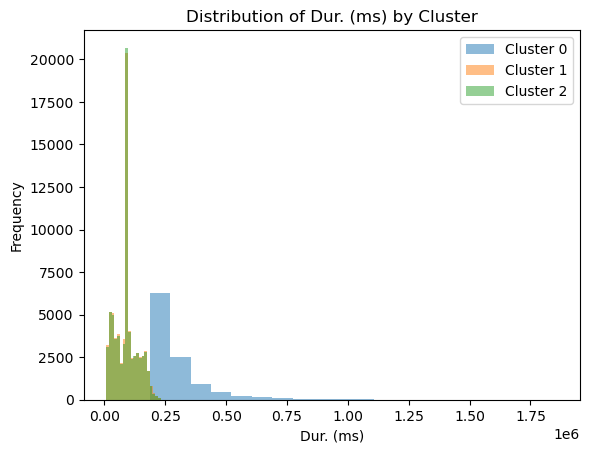

In [91]:

user_identifier = 'MSISDN/Number'

# List of non-normalized engagement metrics
engagement_metrics = [
    'Total Traffic (Bytes)',
    'Dur. (ms)',  # Add more metrics as needed
]

# Create a DataFrame to store cluster-wise metrics summary
cluster_metrics_summary = pd.DataFrame()

# Compute metrics summary for each cluster
for cluster in range(3):  # Assuming k=3 clusters
    cluster_data = df[df['Cluster Label'] == cluster]
    metrics_summary = cluster_data[engagement_metrics].agg(['min', 'max', 'mean', 'sum']).transpose()
    metrics_summary['Cluster'] = cluster
    cluster_metrics_summary = pd.concat([cluster_metrics_summary, metrics_summary])

# Display the cluster-wise metrics summary
print("Cluster-wise Metrics Summary:")
print(cluster_metrics_summary)

# Visual interpretation (you can customize this part based on your metrics and clusters)
for metric in engagement_metrics:
    print(f"\nVisualization for {metric}:")
    for cluster in range(3):
        cluster_data = df[df['Cluster Label'] == cluster]
        cluster_values = cluster_data[metric]
        
        # Plot a histogram for each cluster
        plt.hist(cluster_values, alpha=0.5, label=f'Cluster {cluster}', bins=20)
        
    plt.title(f'Distribution of {metric} by Cluster')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [92]:

user_identifier = 'MSISDN/Number'

# List of columns representing different applications
application_columns = [
    'Social Media DL (Bytes)',
    'Google DL (Bytes)',
    'Email DL (Bytes)',
    'Youtube DL (Bytes)',
    'Netflix DL (Bytes)',
    'Gaming DL (Bytes)',
    'Other DL (Bytes)',
    'Social Media UL (Bytes)',
    'Google UL (Bytes)',
    'Email UL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix UL (Bytes)',
    'Gaming UL (Bytes)',
    'Other UL (Bytes)'
    # Add more application columns as needed
]

# Create a new DataFrame to store aggregated results
aggregated_application_df = pd.DataFrame()

# Aggregate total traffic for each application per user
for column in application_columns:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        # Group by user and sum the volume for the current application
        app_aggregated = df.groupby(user_identifier)[column].sum().reset_index()
        
        # Rename the column to include the application name
        app_aggregated.rename(columns={column: f'Total {column}'}, inplace=True)
        
        # Merge with the aggregated_application_df
        if aggregated_application_df.empty:
            aggregated_application_df = app_aggregated
        else:
            aggregated_application_df = pd.merge(aggregated_application_df, app_aggregated, on=user_identifier)

# Display the aggregated results
print("Aggregated Total Traffic per Application:")
print(aggregated_application_df)

# Derive the top 10 most engaged users per application
top_10_users_per_application = pd.DataFrame()
for column in aggregated_application_df.columns[1:]:  # Exclude the user identifier column
    top_users = aggregated_application_df.sort_values(column, ascending=False).head(10)
    top_users['Application'] = column
    top_10_users_per_application = pd.concat([top_10_users_per_application, top_users])

# Display the top 10 most engaged users per application
print("\nTop 10 Most Engaged Users per Application:")
print(top_10_users_per_application[[user_identifier, 'Application', 'Total Traffic (Bytes)']]) 

Aggregated Total Traffic per Application:
            MSISDN/Number  Total Social Media DL (Bytes)  \
0           33601001722.0                   2.206504e+06   
1           33601001754.0                   2.598548e+06   
2           33601002511.0                   3.148004e+06   
3           33601007832.0                   2.514690e+05   
4           33601008617.0                   2.861230e+06   
...                   ...                            ...   
106852      33789997247.0                   4.422140e+05   
106853    3197020876596.0                   6.685960e+05   
106854  337000037000919.0                   4.963370e+05   
106855  882397108489451.0                   1.500145e+06   
106856            Unknown                   1.937715e+09   

        Total Google DL (Bytes)  Total Email DL (Bytes)  \
0                  3.337123e+06            8.374000e+05   
1                  4.197697e+06            2.828821e+06   
2                  3.343483e+06            2.436500e+06   
3

KeyError: "['Total Traffic (Bytes)'] not in index"

In [93]:


import matplotlib.pyplot as plt

user_identifier = 'MSISDN/Number'

# List of application columns to aggregate
application_columns = [
    'Social Media DL (Bytes)',
    'Google DL (Bytes)',
    'Email DL (Bytes)',
    'Youtube DL (Bytes)',
    'Netflix DL (Bytes)',
    'Gaming DL (Bytes)',
    'Other DL (Bytes)',
    # Add more application columns as needed
]

# Create a new DataFrame to store aggregated results
aggregated_app_traffic_df = pd.DataFrame()

# Aggregate total traffic per application per user
for column in application_columns:
    # Group by user and calculate the total traffic for the current application
    app_traffic_aggregated = df.groupby(user_identifier)[column].sum().reset_index()
    
    # Rename the column to include the application name
    app_traffic_aggregated.rename(columns={column: f'Total {column}'}, inplace=True)
    
    # Merge with the aggregated_app_traffic_df
    if aggregated_app_traffic_df.empty:
        aggregated_app_traffic_df = app_traffic_aggregated
    else:
        aggregated_app_traffic_df = pd.merge(aggregated_app_traffic_df, app_traffic_aggregated, on=user_identifier)

# Display the aggregated results
print("Aggregated Total Traffic per Application:")
print(aggregated_app_traffic_df)

# Print columns of the DataFrame
print("Columns of aggregated_app_traffic_df:")
print(aggregated_app_traffic_df.columns)

# Check if DataFrame is empty
if aggregated_app_traffic_df.empty:
    print("DataFrame is empty. Check your data.")
else:
    # Derive the total traffic for each application
    total_traffic_per_application = aggregated_app_traffic_df[application_columns].sum()

    # Sort applications based on total traffic
    top_applications_sorted = total_traffic_per_application.sort_values(ascending=False).head(3)

    # Plot the top 3 most used applications using a bar chart
    plt.figure(figsize=(10, 6))
    top_applications_sorted.plot(kind='bar', color='skyblue')
    plt.title('Top 3 Most Used Applications')
    plt.xlabel('Application')
    plt.ylabel('Total Traffic (Bytes)')
    plt.xticks(rotation=45, ha='right')
    plt.show()



Aggregated Total Traffic per Application:
            MSISDN/Number  Total Social Media DL (Bytes)  \
0           33601001722.0                   2.206504e+06   
1           33601001754.0                   2.598548e+06   
2           33601002511.0                   3.148004e+06   
3           33601007832.0                   2.514690e+05   
4           33601008617.0                   2.861230e+06   
...                   ...                            ...   
106852      33789997247.0                   4.422140e+05   
106853    3197020876596.0                   6.685960e+05   
106854  337000037000919.0                   4.963370e+05   
106855  882397108489451.0                   1.500145e+06   
106856            Unknown                   1.937715e+09   

        Total Google DL (Bytes)  Total Email DL (Bytes)  \
0                  3.337123e+06            8.374000e+05   
1                  4.197697e+06            2.828821e+06   
2                  3.343483e+06            2.436500e+06   
3

KeyError: "None of [Index(['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',\n       'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',\n       'Other DL (Bytes)'],\n      dtype='object')] are in the [columns]"

In [94]:
# Print the columns of the DataFrame to see the exact names
print(df.columns)


Index(['id', 'Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)',
       'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other 

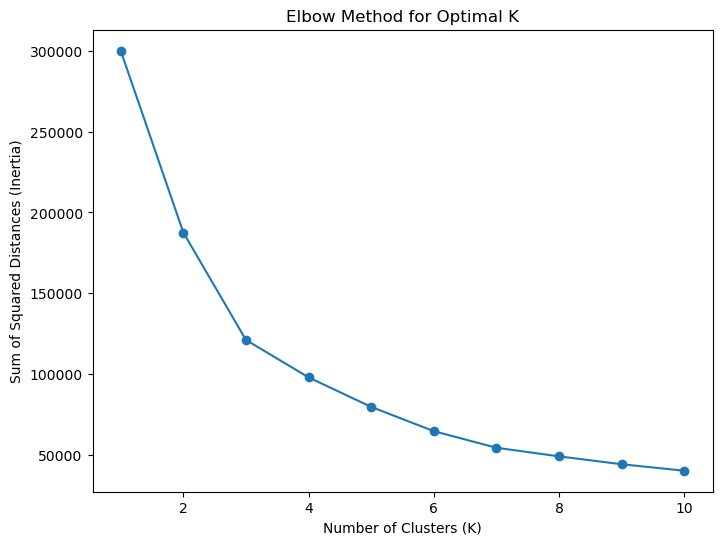

In [95]:


# Select engagement metrics for clustering
engagement_metrics = [
    'Normalized Total Traffic (Bytes)',
    'Normalized Dur. (ms)',  # Add more metrics as needed
]

# Create a DataFrame for clustering
clustering_data = normalized_metrics_df[engagement_metrics]

# Run k-means for a range of k values
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


In [96]:
# Pairplot for visualizing relationships between numerical variables
sns.pairplot(df)
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/mebmeressa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


# Univariate Analysis

Histogram for Duration (ms):

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
plt.hist(df['Dur. (ms)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()



# Bivariate Analysis:

Bar Chart for Social Media Usage:

In [97]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df['Total UL (Bytes)'], df['Total DL (Bytes)'], alpha=0.5)
plt.title('Scatter Plot between Total UL (Bytes) and Total DL (Bytes)')
plt.xlabel('Total UL (Bytes)')
plt.ylabel('Total DL (Bytes)')
plt.show()



In [ ]:
# Assuming 'df' is your DataFrame containing the data
# Replace column names if different

# Check for missing values in 'Social Media DL (Bytes)'
missing_values_social_media = df['Social Media DL (Bytes)'].isnull().sum()
print(f"Missing values in 'Social Media DL (Bytes)': {missing_values_social_media}")
missing_values_msisdn = df['MSISDN/Number'].isnull().sum()
print(f"Missing values in 'MSISDN/Number': {missing_values_msisdn}")


# Heatmap for Correlation:

In [ ]:
# Assuming 'df' is your DataFrame containing the data
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Boxplot for Duration by Application:

In [98]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='Handset Manufacturer', y='Total UL (Bytes)', data=df)
plt.title('Boxplot of Total UL (Bytes) for Each Handset Manufacturer')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Total UL (Bytes)')
plt.xticks(rotation=45)
plt.show()



# Outlier Detection

In [ ]:
# Boxplot for detecting outliers
sns.boxplot(x='column_name', data=df)
plt.show()


# Feature Engineering:

In [ ]:
# Create new features or modify existing ones
df['new_feature'] = df['feature1'] + df['feature2']


# Data Transformation:

In [ ]:
# Standardize or normalize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['numeric_column1', 'numeric_column2']] = scaler.fit_transform(df[['numeric_column1', 'numeric_column2']])


# Explore Categorical Variables:

In [ ]:
# Frequency distribution of a categorical variable
df['categorical_column'].value_counts()

# Barplot for a categorical variable
sns.barplot(x='category_column', y='numeric_column', data=df)
plt.show()
